In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt


In [2]:
from singa import tensor

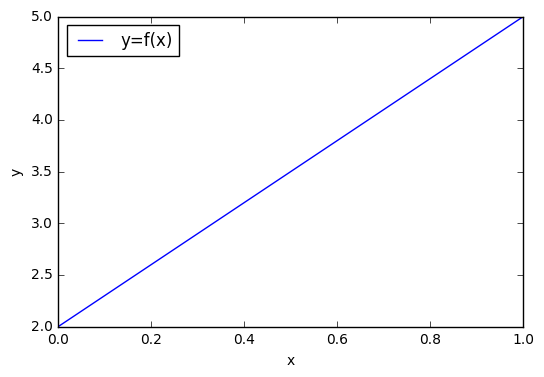

In [3]:

a, b = 3, 2
f = lambda x: a * x + b
x1 = np.linspace(0.,1,100)
y1 = [f(x) for x in x1]
plt.plot(x1, y1, label='y=f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')


9.43585917155
7.13088328044
5.39435068766
4.08607254028
3.10043207804
2.35786031087
1.79841181437
1.37692426046
1.05937461853
0.820129330953
0.639876937866
0.504068915049
0.401744302114
0.324645582835
0.26655163765
0.222775395711
0.189786291122
0.164923922221
0.146184015274
0.132056728999


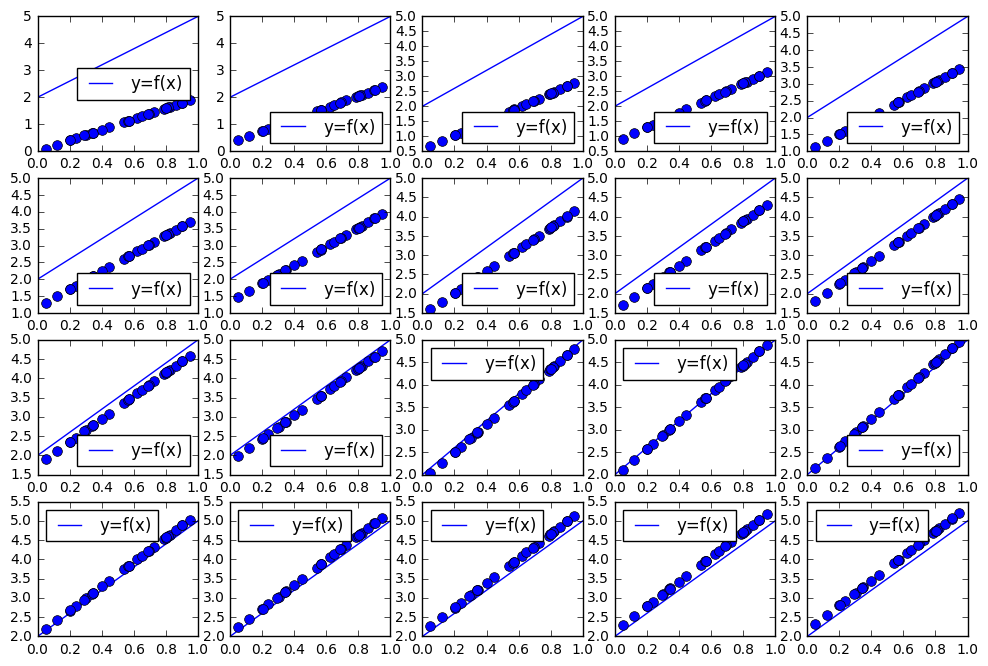

In [4]:
fig, axes = plt.subplots(4, 5, figsize=(12, 8))
#print axes

def plot(idx, x, y, yp):
    global x1, y1, axes

    axes[idx/5, idx%5].plot(x1, y1, label='y=f(x)')
    #axes[idx/5, idx%5].plot(x, y, 'ro', ms=7)
    axes[idx/5, idx%5].plot(x, yp, 'bo', ms=7)
    axes[idx/5, idx%5].legend(loc='best')

# set hyper-parameters
max_iter = 4*5
alpha = 0.1

# init parameters
a1, b1 = 2.,0.

nb_points = 30

# generate training data
train_x = np.asarray(np.random.uniform(0., 1., nb_points), np.float32)
train_y = np.asarray(f(train_x) + np.random.rand(30), np.float32)
#print train_x
#print train_y


train_x = tensor.from_numpy(train_x)
train_y = tensor.from_numpy(train_y)
# sgd
for idx in range(max_iter):
    y = train_x * a1 + b1
    err = y - train_y
    loss = tensor.sum(err * err) / nb_points
    print loss
    da1 = tensor.sum(err * train_x) / nb_points
    db1 = tensor.sum(err) / nb_points
    a1 -= da1 * alpha
    b1 -= db1 * alpha
    plot(idx, tensor.to_numpy(train_x), tensor.to_numpy(train_y), tensor.to_numpy(y))
